### Imports

In [1]:
import os
import numpy as np
from sklearn import preprocessing, neighbors
from sklearn.model_selection import train_test_split 
from sklearn import metrics
import pandas as pd

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

### Load Data

In [2]:
df = pd.read_csv('dataset/raw_data.csv')

### Preview data and shape

In [3]:
df.head(5)

,age,gender,education,marital_status,monthly_income,limit_diet,gain_10kg,gain_lose_3kg,eat_2h_sleep,soft_drink,...,spo2,bp_sys,bp_dia,blood_glucose,blood_hemoglobin,urinary_glucose,urinary_protein,pulse_rate,uric_acid,health_status
0,59,Male,7. Higher (Master or Doctor) completed,2. Current married or living together,"5. Taka 50,001 or more",No,1. No,1. No,1. No,1. No,...,96,138,78,234 (PBS),NaN,-,-,94,4.3,3
1,60,Male,7. Higher (Master or Doctor) completed,2. Current married or living together,"5. Taka 50,001 or more",Yes,2. Yes,1. No,2. Yes,1. No,...,96,128,67,93.6 (PBS),NaN,-,-,62,5.8,2
2,58,Male,7. Higher (Master or Doctor) completed,2. Current married or living together,"5. Taka 50,001 or more",Yes,2. Yes,2. Yes,2. Yes,1. No,...,96,140,81,133.2 (PBS),NaN,-,-,60,7.0,3
3,50,Female,7. Higher (Master or Doctor) completed,2. Current married or living together,"5. Taka 50,001 or more",Yes,1. No,1. No,2. Yes,2. Yes,...,99,102,65,75.6 (PBS),10.9,-,-,82,3.6,2
4,56,Male,7. Higher (Master or Doctor) completed,2. Current married or living together,"5. Taka 50,001 or more",Yes,1. No,1. No,2. Yes,1. No,...,96,155,98,223.2 (PBS),NaN,-,-,92,5.0,3


In [4]:
df.shape

(50, 33)

### Get Percentage of missing data in each column

In [5]:
df.isnull().mean().round(4).mul(100).sort_values(ascending=False)

blood_hemoglobin     86.0
health_status         0.0
gain_lose_3kg         0.0
walking_habit         0.0
eat_faster            0.0
skip_breakfast        0.0
fast_food             0.0
soft_drink            0.0
eat_2h_sleep          0.0
gain_10kg             0.0
walk_faster           0.0
limit_diet            0.0
monthly_income        0.0
marital_status        0.0
education             0.0
gender                0.0
physical_activity     0.0
sleep_habit           0.0
uric_acid             0.0
stop_activity         0.0
height                0.0
weight                0.0
waist                 0.0
hip                   0.0
body_temperature      0.0
spo2                  0.0
bp_sys                0.0
bp_dia                0.0
blood_glucose         0.0
urinary_glucose       0.0
urinary_protein       0.0
pulse_rate            0.0
age                   0.0
dtype: float64

### Show unique values of each non numeric columns

In [6]:
# viewing all the data to determine not numeric columns
df.apply(lambda col: col.unique())

age                  [59, 60, 58, 50, 56, 57, 45, 55, 52, 53, 43, 5...
gender                                                  [Male, Female]
education            [7. Higher (Master or Doctor) completed, 4. Hi...
marital_status                 [2. Current married or living together]
monthly_income       [5. Taka 50,001 or more, 4. Taka 20,001-50,000...
limit_diet                                                   [No, Yes]
gain_10kg                              [1.  No, 2. Yes, 3. Don't Know]
gain_lose_3kg                           [1. No, 2. Yes, 3. Don't Know]
eat_2h_sleep                                           [1. No, 2. Yes]
soft_drink                              [1. No, 2. Yes, 3. Don't Know]
fast_food                                              [1. No, 2. Yes]
skip_breakfast                                         [2. Yes, 1. No]
eat_faster                              [1. No, 2. Yes, 3. Don't Know]
walking_habit        [2. Less than 1 hour per day, 3. Don壽猼 go outs...
physic

In [7]:
all_columns = df.apply(lambda col: col.unique())
# all_columns is of type panas.series not pandas.dataframe so drop mechanism is a little different
non_numeric_columns = all_columns.drop(labels = ['age', 'height', 'weight','waist','hip','body_temperature','bp_sys','bp_dia','blood_glucose','blood_hemoglobin','pulse_rate','uric_acid','health_status'])
print(non_numeric_columns)

gender                                                  [Male, Female]
education            [7. Higher (Master or Doctor) completed, 4. Hi...
marital_status                 [2. Current married or living together]
monthly_income       [5. Taka 50,001 or more, 4. Taka 20,001-50,000...
limit_diet                                                   [No, Yes]
gain_10kg                              [1.  No, 2. Yes, 3. Don't Know]
gain_lose_3kg                           [1. No, 2. Yes, 3. Don't Know]
eat_2h_sleep                                           [1. No, 2. Yes]
soft_drink                              [1. No, 2. Yes, 3. Don't Know]
fast_food                                              [1. No, 2. Yes]
skip_breakfast                                         [2. Yes, 1. No]
eat_faster                              [1. No, 2. Yes, 3. Don't Know]
walking_habit        [2. Less than 1 hour per day, 3. Don壽猼 go outs...
physical_activity                                            [Yes, No]
walk_f

In [8]:
non_numeric_columns.sleep_habit

array(['2. Rarely (1-5 days per month)',
       '3. Sometimes (6-10 days per month)', '1. Never',
       '5. Always (everyday)'], dtype=object)

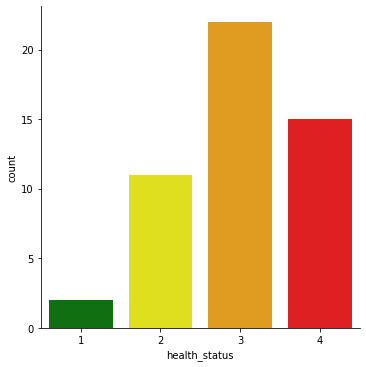

In [10]:
# Health status count for each type
sns.catplot(x='health_status', data=df, kind = 'count', palette={1:"green", 2:"yellow", 3:'orange', 4:'red'})

In [11]:
df.unnamed

AttributeError: 'DataFrame' object has no attribute 'unnamed'